In [72]:
import pandas as pd

# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [73]:
sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


- Mostrami le vendite maggiori di 10

In [74]:
sales[sales['sales']>10]

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


Mostrami i dati del 2018

In [75]:
sales[sales['year'] == 2018]

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


- Mostrami le vendite maggiori di 13 e l'anno è il 2018

In [76]:
sales[sales['sales']>13][sales['year'] == 2018]

/var/folders/v_/6hg1www14ln23d8qxx52_9dr0000gn/T/ipykernel_63383/118493252.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales[sales['sales']>13][sales['year'] == 2018]


,employee,sales,year
0,Katrina,14,2018


- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

In [77]:
sales[~((sales['sales']>13) & (sales['year'] == 2018))]

,employee,sales,year
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

In [78]:
sales[(sales['sales'] / 3) > 3]

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J

In [79]:
sales['employee'][sales['employee'] > 'J']

0       Katrina
2           Jan
3         Roman
4    Jacqueline
5         Paola
Name: employee, dtype: object

# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
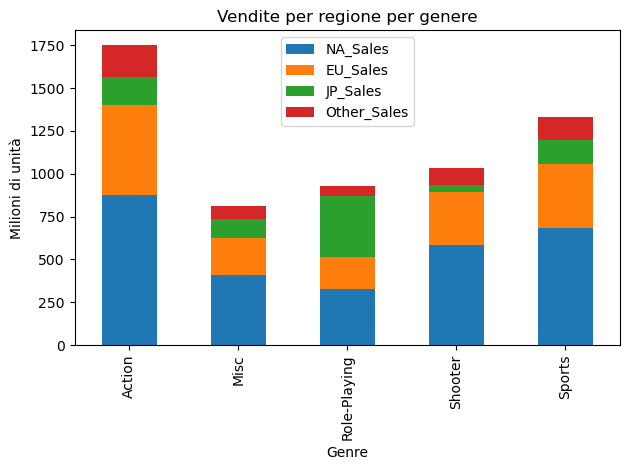


In [80]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


1. Quanti videogiochi sono stati pubblicati

In [149]:
print(len(df))  #ripetuti

16598


2. Quali sono i generi più popolari? Mostralo con un bar plot

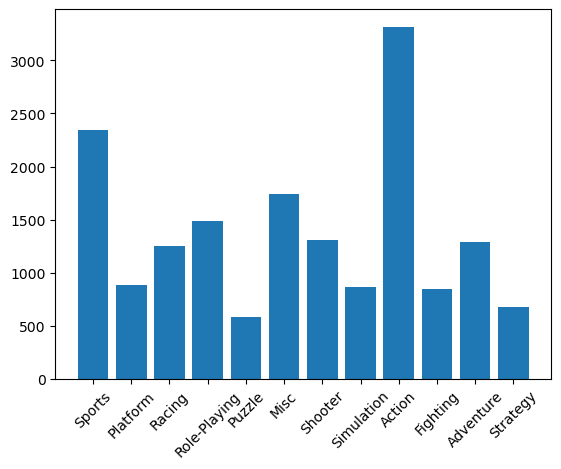

In [82]:
generi = df['Genre'].unique()
freq = []
for g in generi:
    freq.append(len(df[df['Genre'] == g]))
plt.bar(generi, freq)
plt.xticks(rotation=45)
plt.show()

3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo

<Axes: xlabel='Anno'>

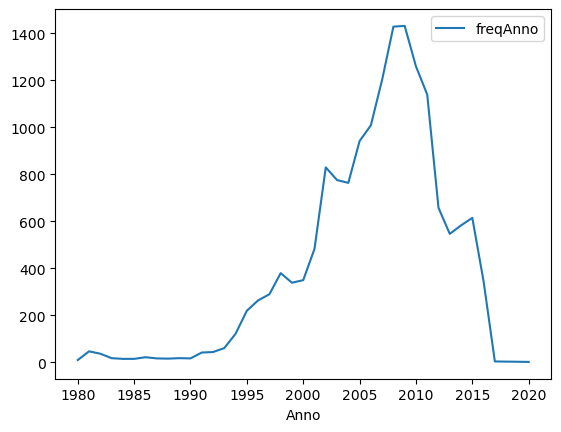

In [222]:
anni = df['Year'].dropna().unique()
freqAnno = []
for anno in anni:
    freqAnno.append(len(df[df['Year'] == anno]))
df2 = pd.DataFrame({'Anno': anni, 'freqAnno': freqAnno})
df2 = df2.sort_values(by='Anno').reset_index()
df2.plot('Anno', 'freqAnno', kind='line')

<Axes: xlabel='Year'>

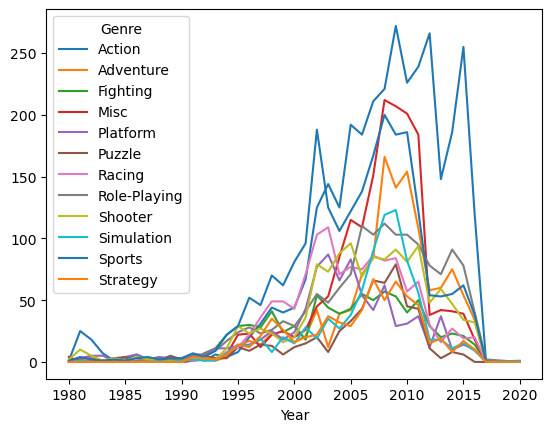

In [259]:
df3 = df[['Year', 'Genre']].dropna()
df_gruppi = df3.groupby(['Year', 'Genre']).size().reset_index(name='freqAnno')
pivot = df_gruppi.pivot(index='Year', columns='Genre', values='freqAnno').fillna(0)
pivot.plot(kind='line')


4. Prova a riprodurre questo plot 

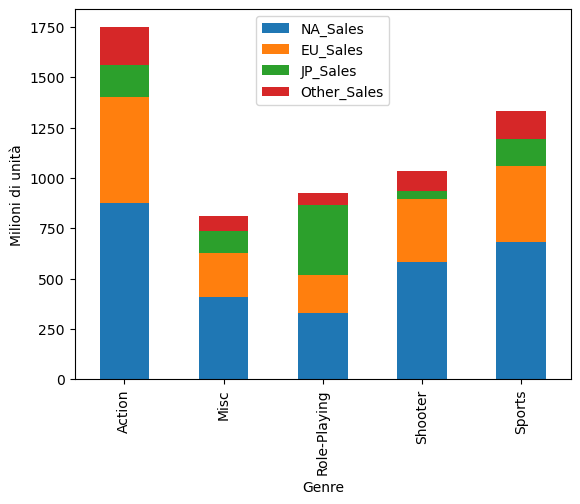

In [285]:
df4 = df.dropna(subset=['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
df4_gruppi = df4.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
gruppi=['Action', 'Misc', 'Role-Playing', 'Shooter', 'Sports']
df4_filtrato = df4_gruppi.loc[gruppi]
df4_filtrato.plot(kind='bar', stacked=True)
plt.ylabel("Milioni di unità")
plt.xlabel("Genre")
plt.legend(loc='upper center')